# Letter Recognition : Building Letter Recognition ML model
## ML III _ Project

### Notebook by Yogesh Chandra Ramakrishna
#### Supported by [Birsa Anand](https://www.insaid.co/)

#### Source of the Data : INSAID

<a id=Index><a/>

## Table of Contents

1. [Introduction](#Introduction)<br/>
2. [Required libraries](#Required-libraries)<br/>
3. [Problem Statement](#section3)<br/>
4. [Data Loading and Description](#section4)<br/>
5. [Data Profiling](#section5)<br/>
    - 5.1 [Understanding the Dataset](#section501)<br/>
    - 5.2 [Processing](#section502)<br/>
    - 5.3 [Skew and Kurt](#section503)<br/>
    - 5.4 [Correlation](#section504)<br/>
6. [Exploratory Data Analysis](#section6)<br/>
    - 6.1 [UNIVARIATE ANALYSIS OF THE TARGET FIELD](#section601)<br/>
    - 6.2 [Sample Correlation](#section602)<br/>
    - 6.3 [Multicollinearity](#section603)<br/>
7. [Dimensionality Reduction and Outliers](#section7)<br/>
    - 7.1 [Dimensionality Reduction using PCA](#section701)<br/>
8. [Machine Learning Model](#section8)<br/>
    - 8.1 [Working with PCA Data Set](#section801)<br/>
    - 8.2 [Working with complete Data Set](#section802)<br/>
9. [Model Selection](#section9)<br/>
10. [Conclusion and Reference](#section10)<br/>

<a id=Introduction><a/>

## 1. Introduction

The notebooks explores the basic use of __Numpy__,__Pandas__, __Seaborn__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.

And also we will be using __scikit learn__ and various __Machine Learning__ models, to build a predictive model, I will be doing some Statistical analysys to make this Model as accurate as possible.


* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes
    
    
* __Statistical Overview__ <br/>
Statistical tests are the scientific way to prove the validation of theories. In any case, when we look at the data, we seem to have an intuitive understanding of where data is leading us. However, when we do statistical tests, we get a scientific or mathematical perspective of how significant these results are. Let's apply some of the tests and see how we are doing with our predictions.


* __Machine Learning Modeling__ <br/>
The process of training an ML model involves providing an ML algorithm (that is, the learning algorithm) with training data to learn from. The term ML model refers to the model artifact that is created by the training process.

#### [Back to Index](#Index)

<a id=Required-libraries><a/>

## 2. Required libraries

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **cufflinks**: interactive graphs
* **Scikit-learn**: is a machine learning library for the Python programming language.

__Note: Will import Scikit-learn libraries in the modeling section itself__

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

import cufflinks as cf
cf.go_offline()

from IPython.core.display import Image, display
from collections import Counter

#### [Back to Index](#Index)

<a id=section3><a/>

## 3. Problem Statement

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

#### [Back to Index](#Index)

<a id=section4><a/>

## 4. Data Loading and Description

- Data set of 16000 in Train data and 3999 in Test data observations are recorded. 
- The dataset comprises of __16000 observations of 18 columns and 3999 observations of 17 columns__. 

- __Data fields__

  - letter : capital letter (26 values from A to Z) 
  - x-box : horizontal position of box 
  - y-box : vertical position of box 
  - width : width of box 
  - high : height of box 
  - onpix : total # on pixels 
  - x-bar : mean x of on pixels in box 
  - y-bar : mean y of on pixels in box 
  - x2bar : mean x variance 
  - y2bar : mean y variance 
  - xybar : mean x y correlation 
  - x2ybr : mean of x * x * y 
  - xy2br : mean of x * y * y 
  - x-ege : mean edge count left to right 
  - xegvy : correlation of x-ege with y 
  - y-ege : mean edge count bottom to top 
  - yegvx : correlation of y-ege with x

In [2]:
train = pd.read_csv("../ProjectData/LetterRecognition_train.csv")
test = pd.read_csv("../ProjectData/LetterRecognition_test.csv")

#### [Back to Index](#Index)

<a id=section5><a/>

## 5. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- In __processing__ we will deal with zero, null and missing values of columns. 

<a id=section501><a/>

### 5.1 Understanding the Dataset

In [3]:
test.shape

(3999, 17)

In [4]:
train.shape

(16000, 18)

In [5]:
train.get_dtype_counts()

int64     17
object     1
dtype: int64

In [6]:
test.get_dtype_counts()

int64    17
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 17 columns):
x-box    3999 non-null int64
y-box    3999 non-null int64
width    3999 non-null int64
high     3999 non-null int64
onpix    3999 non-null int64
x-bar    3999 non-null int64
y-bar    3999 non-null int64
x2bar    3999 non-null int64
y2bar    3999 non-null int64
xybar    3999 non-null int64
x2ybr    3999 non-null int64
xy2br    3999 non-null int64
x-ege    3999 non-null int64
xegvy    3999 non-null int64
y-ege    3999 non-null int64
yegvx    3999 non-null int64
id       3999 non-null int64
dtypes: int64(17)
memory usage: 531.2 KB


In [9]:
train.head()

letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0      I      5     12      3     7      2     10      5      5      4     13   
1      D      4     11      6     8      6     10      6      2      6     10   
2      N      7     11      6     6      3      5      9      4      6      4   
3      G      2      1      3     1      1      8      6      6      6      6   
4      S      4     11      5     8      3      8      8      6      9      5   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  id  
0      3      9      2      8      4     10   1  
1      3      7      3      7      3      9   2  
2      4     10      6     10      2      8   3  
3      5      9      1      7      5     10   4  
4      6      6      0      8      9      7   5

In [10]:
test.head()

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      6      9      8     4      3      8      7      3      4     13      5   
1      6      9      8     8     10      7      7      5      4      7      6   
2      5      6      6     4      3      7      6      2      7      7      6   
3      5      9      7     6      4      9      7      3      5     10      4   
4      5      8      8     6      6      5      8      3      6     10      8   

   xy2br  x-ege  xegvy  y-ege  yegvx     id  
0      8      6      8      0      8  16001  
1      8      7      9      7     10  16002  
2      9      0      9      4      8  16003  
3      6      5      8      1      7  16004  
4      8      4      8      4      6  16005

In [11]:
train['letter'].value_counts()

M    648
U    646
T    644
Y    641
D    638
P    635
A    633
B    630
X    628
V    628
F    622
N    617
E    616
Q    615
O    614
W    613
G    609
L    604
J    599
R    597
C    594
K    593
I    590
S    587
H    583
Z    576
Name: letter, dtype: int64

In [12]:
train['letter'].value_counts().count()

26

#### Descriptive statistics using Pandas

In [13]:
train.describe(include=np.object).transpose()

count unique top freq
letter  16000     26   M  648

In [14]:
train.describe(include=np.number).transpose()

count         mean          std  min      25%     50%       75%  \
x-box  16000.0     4.020313     1.908436  0.0     3.00     4.0      5.00   
y-box  16000.0     7.029063     3.303998  0.0     5.00     7.0      9.00   
width  16000.0     5.117500     2.003202  0.0     4.00     5.0      6.00   
high   16000.0     5.366000     2.262656  0.0     4.00     6.0      7.00   
onpix  16000.0     3.500625     2.192613  0.0     2.00     3.0      5.00   
x-bar  16000.0     6.892688     2.029576  0.0     6.00     7.0      8.00   
y-bar  16000.0     7.512000     2.333494  0.0     6.00     7.0      9.00   
x2bar  16000.0     4.627562     2.711330  0.0     3.00     4.0      6.00   
y2bar  16000.0     5.170187     2.384917  0.0     4.00     5.0      7.00   
xybar  16000.0     8.286625     2.485706  0.0     7.00     8.0     10.00   
x2ybr  16000.0     6.471063     2.641917  0.0     5.00     6.0      8.00   
xy2br  16000.0     7.927062     2.071988  0.0     7.00     8.0      9.00   
x-ege  16000.0     3.049313     2.342829  0.0     1.00     3.0      4.00   
xegvy  16000.0     8.343937     1.550055  0.0     8.00     8.0      9.00   
y-ege  16000.0     3.682313     2.571245  0.0     2.00     3.0      5.00   
yegvx  16000.0     7.796125     1.603464  1.0     7.00     8.0      8.00   
id     16000.0  8000.500000  4618.946489  1.0  4000.75  8000.5  12000.25   

           max  
x-box     15.0  
y-box     15.0  
width     15.0  
high      15.0  
onpix     15.0  
x-bar     15.0  
y-bar     15.0  
x2bar     15.0  
y2bar     15.0  
xybar     15.0  
x2ybr     15.0  
xy2br     15.0  
x-ege     15.0  
xegvy     15.0  
y-ege     15.0  
yegvx     15.0  
id     16000.0

In [15]:
test.describe().transpose()

count          mean          std      min      25%      50%      75%  \
x-box  3999.0      4.037009     1.932355      0.0      3.0      4.0      5.0   
y-box  3999.0      7.061015     3.307453      0.0      5.0      7.0      9.0   
width  3999.0      5.139785     2.059572      0.0      4.0      5.0      6.0   
high   3999.0      5.398350     2.256691      0.0      4.0      6.0      7.0   
onpix  3999.0      3.527382     2.181873      0.0      2.0      3.0      5.0   
x-bar  3999.0      6.916979     2.012122      0.0      6.0      7.0      8.0   
y-bar  3999.0      7.452863     2.290816      0.0      6.0      7.0      8.0   
x2bar  3999.0      4.633908     2.653683      0.0      3.0      4.0      6.0   
y2bar  3999.0      5.212303     2.364632      0.0      4.0      5.0      7.0   
xybar  3999.0      8.264316     2.499806      0.0      7.0      7.0     10.0   
x2ybr  3999.0      6.384846     2.586122      0.0      5.0      6.0      8.0   
xy2br  3999.0      7.936734     2.115298      2.0      7.0      8.0      9.0   
x-ege  3999.0      3.034009     2.290954      0.0      2.0      3.0      4.0   
xegvy  3999.0      8.318580     1.533528      1.0      8.0      8.0      9.0   
y-ege  3999.0      3.730433     2.549922      0.0      2.0      4.0      5.0   
yegvx  3999.0      7.821455     1.672581      0.0      7.0      8.0      9.0   
id     3999.0  18000.000000  1154.556192  16001.0  17000.5  18000.0  18999.5   

           max  
x-box     14.0  
y-box     15.0  
width     14.0  
high      14.0  
onpix     15.0  
x-bar     15.0  
y-bar     15.0  
x2bar     15.0  
y2bar     15.0  
xybar     15.0  
x2ybr     15.0  
xy2br     15.0  
x-ege     15.0  
xegvy     14.0  
y-ege     15.0  
yegvx     15.0  
id     19999.0

#### Observation

- No datas are missing from both the data set.
- looking at standard deviation and mean we can assume that data is normally distributed.
- Lets do some pandas profiling and then verify.

#### [Back to Index](#Index)

<a id=section502><a/>

### 5.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contains all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

__Training Data__

In [16]:
profile = pandas_profiling.ProfileReport(train)
profile.to_file(outputfile="../PandasProfiling/TrainingData_Pre_Profiling.html")

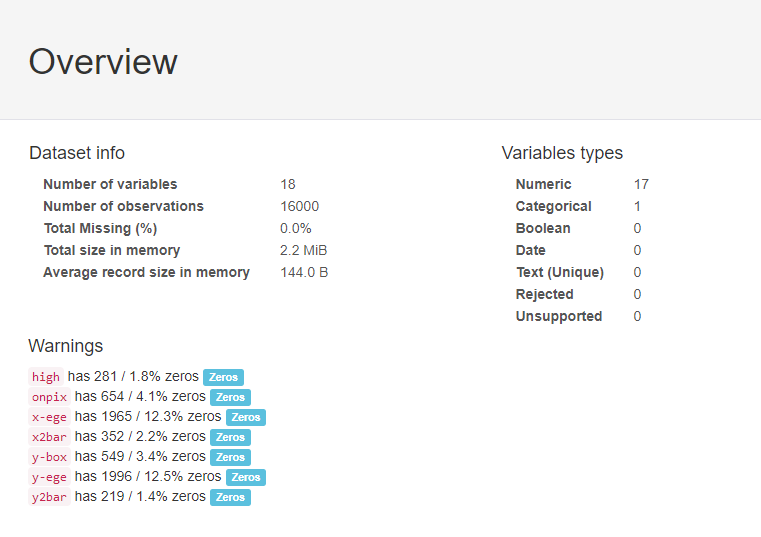

In [17]:
from IPython.core.display import Image, display
display(Image(filename = "../Images/TrainingData_Pre_Profiling.png", width=800, unconfined=True))

__Test Data__

In [18]:
profile = pandas_profiling.ProfileReport(test)
profile.to_file(outputfile="../PandasProfiling/TestData_Pre_Profiling.html")

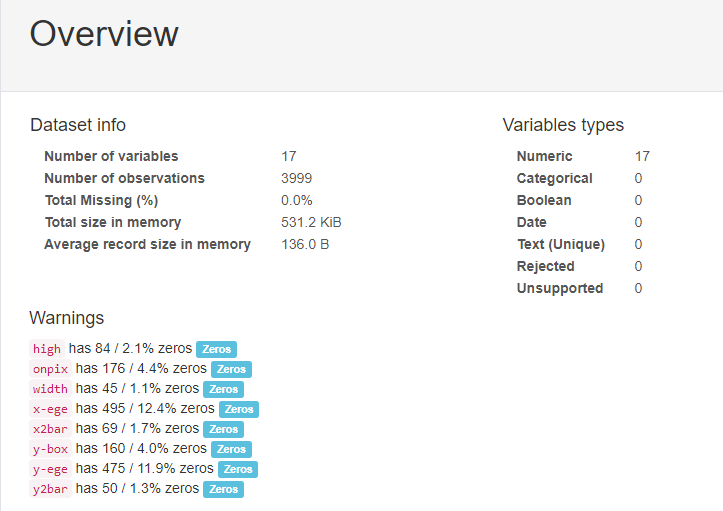

In [19]:
display(Image(filename = "../Images/TestData_Pre_Profiling.png", width=800, unconfined=True))

#### Observation

- We are confirmed that there are no missing values and no much inconsistency in our data set.
-  We are good to proceed further analysis.

#### [Back to Index](#Index)

<a id=section503><a/>

### 5.3 Data Processing

__Train Data__

In [20]:
train.columns[train.dtypes!=object]

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx',
       'id'],
      dtype='object')

In [21]:
mynonObjlist = []
mynonObjlist = train.columns[train.dtypes!=object]

for each in mynonObjlist:
    if train[each].dtypes == np.object:
        print('Its an Object')
    elif train[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, train[each].isnull().sum()))

In [22]:
train.columns[train.dtypes==object]

Index(['letter'], dtype='object')

In [23]:
mynonObjlist = []
mynonObjlist = train.columns[train.dtypes==object]

for each in mynonObjlist:
    if train[each].dtypes != np.object:
        print('Its an Object')
    elif train[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, train[each].isnull().sum()))

<Figure size 2000x2000 with 0 Axes>

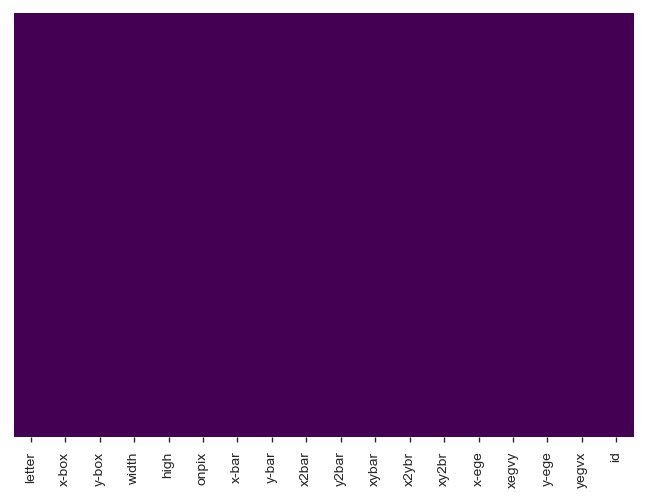

<Figure size 2000x2000 with 0 Axes>

In [24]:
## Missig Data heatmap

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

__Test Data__

In [25]:
test.columns[test.dtypes!=object]

Index(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar',
       'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx',
       'id'],
      dtype='object')

In [26]:
mynonObjlist = []
mynonObjlist = test.columns[test.dtypes!=object]

for each in mynonObjlist:
    if test[each].dtypes == np.object:
        print('Its an Object')
    elif test[each].isnull().sum() != 0:
            print("{} ------ : {}".format(each, test[each].isnull().sum()))

<Figure size 2000x2000 with 0 Axes>

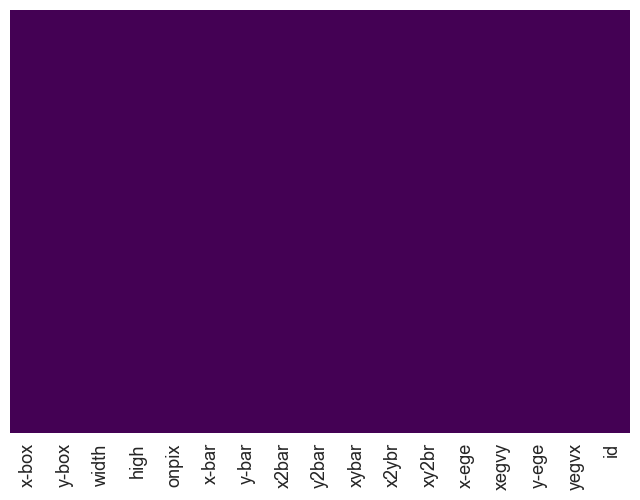

<Figure size 2000x2000 with 0 Axes>

In [27]:
## Missig Data heatmap

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.set(font_scale=1.30)
plt.figure(figsize=(20,20))

#### [Back to Index](#Index)

 #### Skew and Kurt

In [28]:
train.skew()

x-box    0.716027
y-box   -0.214017
width    0.235545
high    -0.263983
onpix    0.958016
x-bar   -0.314306
y-bar    0.092490
x2bar    1.163485
y2bar    0.284163
xybar    0.079676
x2ybr    0.280837
xy2br    0.259543
x-ege    1.061996
xegvy    0.038385
y-ege    0.468238
yegvx   -0.189222
id       0.000000
dtype: float64

In [29]:
test.skew()

x-box    0.710730
y-box   -0.283556
width    0.230827
high    -0.335890
onpix    0.884537
x-bar   -0.291965
y-bar    0.093948
x2bar    1.146188
y2bar    0.299479
xybar    0.130824
x2ybr    0.316895
xy2br    0.326620
x-ege    1.036320
xegvy    0.092894
y-ege    0.469848
yegvx   -0.238342
id       0.000000
dtype: float64

In [30]:
train.kurt()

x-box    0.868668
y-box   -0.420701
width    0.277293
high    -0.250322
onpix    1.191805
x-bar    1.500221
y-bar    0.972550
x2bar    2.087027
y2bar    0.331698
xybar    0.334840
x2ybr    0.294299
xy2br    1.009710
x-ege    1.223557
xegvy    0.895811
y-ege   -0.335460
yegvx    1.043173
id      -1.200000
dtype: float64

In [31]:
test.kurt()

x-box    0.937664
y-box   -0.420615
width    0.394734
high    -0.242206
onpix    1.190227
x-bar    1.466085
y-bar    0.875132
x2bar    2.023012
y2bar    0.322965
xybar    0.284882
x2ybr    0.484120
xy2br    0.994813
x-ege    1.313803
xegvy    0.857142
y-ege   -0.183597
yegvx    1.367558
id      -1.200000
dtype: float64

- lets select only the columns which are having normal distribution.
- We shall consider columns between -0.5 and 0.5

In [32]:
def skew_filter(df,col):
    count = 0
    skew_list = []
    for ev in col:
        if df[ev].skew() > -0.5 and df[ev].skew() < 0.5:
            count+=1
            print('{}--- : {}'.format(ev, df[ev].skew()))
        else:
            skew_list.append(ev)
       
    return skew_list

In [33]:
tr_col = train.columns[train.dtypes!=object]
skewlist = skew_filter(train, tr_col)

y-box--- : -0.2140172690887578
width--- : 0.23554516001808207
high--- : -0.2639831007027788
x-bar--- : -0.3143062528794633
y-bar--- : 0.0924895937957429
y2bar--- : 0.28416291571923336
xybar--- : 0.07967581263934845
x2ybr--- : 0.2808367738496028
xy2br--- : 0.25954259486620046
xegvy--- : 0.03838450902545686
y-ege--- : 0.4682380558846366
yegvx--- : -0.18922234099754928
id--- : 0.0


- Lets take the columns without normal distribution and transform to reduce the skew

In [34]:
train[skewlist] = np.log1p(train[skewlist])

In [35]:
te_col = test.columns[test.dtypes!=object]
test_Skew = skew_filter(test, te_col)

y-box--- : -0.2835563503793638
width--- : 0.23082717566385544
high--- : -0.3358900469079615
x-bar--- : -0.2919651549401112
y-bar--- : 0.0939482435830959
y2bar--- : 0.2994792128014023
xybar--- : 0.13082428860755646
x2ybr--- : 0.31689469451278457
xy2br--- : 0.32661994518531146
xegvy--- : 0.09289406674186994
y-ege--- : 0.46984777847543086
yegvx--- : -0.2383416214455809
id--- : 0.0


In [36]:
test[test_Skew] = np.log1p(test[test_Skew])

- Same set of columns are having normal distribution in both Test and Train data sets.
- Lets check the Kurt of each column.

In [37]:
def kurt_filter(df,col,threshold):
    count = 0
    for ev in col:
        if df[ev].kurt() == threshold:
            print(ev)
            count+=1
            
        
    print("Total Columns without Outliers is : ",count) 

In [38]:
tr_col = train.columns[train.dtypes!=object]
kurt_filter(train, tr_col, 3)

Total Columns without Outliers is :  0


- We have to remove the outliers
- Lets first see the change in skew after transformation

In [39]:
train.skew()

x-box   -0.543748
y-box   -0.214017
width    0.235545
high    -0.263983
onpix   -0.507422
x-bar   -0.314306
y-bar    0.092490
x2bar   -0.587111
y2bar    0.284163
xybar    0.079676
x2ybr    0.280837
xy2br    0.259543
x-ege   -0.434516
xegvy    0.038385
y-ege    0.468238
yegvx   -0.189222
id       0.000000
dtype: float64

In [40]:
test.skew()

x-box   -0.606540
y-box   -0.283556
width    0.230827
high    -0.335890
onpix   -0.584399
x-bar   -0.291965
y-bar    0.093948
x2bar   -0.528933
y2bar    0.299479
xybar    0.130824
x2ybr    0.316895
xy2br    0.326620
x-ege   -0.480704
xegvy    0.092894
y-ege    0.469848
yegvx   -0.238342
id       0.000000
dtype: float64

In [41]:
tr_col = train.columns[train.dtypes!=object]
skewlist = skew_filter(train, tr_col)
skewlist

y-box--- : -0.2140172690887578
width--- : 0.23554516001808207
high--- : -0.2639831007027788
x-bar--- : -0.3143062528794633
y-bar--- : 0.0924895937957429
y2bar--- : 0.28416291571923336
xybar--- : 0.07967581263934845
x2ybr--- : 0.2808367738496028
xy2br--- : 0.25954259486620046
x-ege--- : -0.43451613498103886
xegvy--- : 0.03838450902545686
y-ege--- : 0.4682380558846366
yegvx--- : -0.18922234099754928
id--- : 0.0


['x-box', 'onpix', 'x2bar']

In [42]:
te_col = test.columns[test.dtypes!=object]
skewlist = skew_filter(test, te_col)
skewlist

y-box--- : -0.2835563503793638
width--- : 0.23082717566385544
high--- : -0.3358900469079615
x-bar--- : -0.2919651549401112
y-bar--- : 0.0939482435830959
y2bar--- : 0.2994792128014023
xybar--- : 0.13082428860755646
x2ybr--- : 0.31689469451278457
xy2br--- : 0.32661994518531146
x-ege--- : -0.48070354237946467
xegvy--- : 0.09289406674186994
y-ege--- : 0.46984777847543086
yegvx--- : -0.2383416214455809
id--- : 0.0


['x-box', 'onpix', 'x2bar']

- If we see columns __'x-box', 'onpix', 'x2bar'__ its near to 0.5 or -0.5 so i think we are ok with the skew of the data set
- Lets remove the outliers and see the change in __kurt__.

- before that we have to transform the objet type columns.

In [43]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [44]:
train.kurt()

x-box    0.702061
y-box   -0.420701
width    0.277293
high    -0.250322
onpix    0.356101
x-bar    1.500221
y-bar    0.972550
x2bar    0.990763
y2bar    0.331698
xybar    0.334840
x2ybr    0.294299
xy2br    1.009710
x-ege   -0.274192
xegvy    0.895811
y-ege   -0.335460
yegvx    1.043173
id      -1.200000
dtype: float64

- We have to transform the data

In [45]:
from sklearn.preprocessing import LabelEncoder

labelEnc=LabelEncoder()

myObjlist = []
myObjlist = train.columns[train.dtypes==object]

for col in myObjlist:
    train[col]=labelEnc.fit_transform(train[col])

In [46]:
outliers_iqr(train['letter'])

(array([], dtype=int64),)

In [47]:
train.head()

letter     x-box  y-box  width  high     onpix  x-bar  y-bar     x2bar  \
0       8  1.791759     12      3     7  1.098612     10      5  1.791759   
1       3  1.609438     11      6     8  1.945910     10      6  1.098612   
2      13  2.079442     11      6     6  1.386294      5      9  1.609438   
3       6  1.098612      1      3     1  0.693147      8      6  1.945910   
4      18  1.609438     11      5     8  1.386294      8      8  1.945910   

   y2bar  xybar  x2ybr  xy2br     x-ege  xegvy  y-ege  yegvx  id  
0      4     13      3      9  1.098612      8      4     10   1  
1      6     10      3      7  1.386294      7      3      9   2  
2      6      4      4     10  1.945910     10      2      8   3  
3      6      6      5      9  0.693147      7      5     10   4  
4      9      5      6      6  0.000000      8      9      7   5

In [48]:
test.head()

x-box  y-box  width  high     onpix  x-bar  y-bar     x2bar  y2bar  \
0  1.945910      9      8     4  1.386294      8      7  1.386294      4   
1  1.945910      9      8     8  2.397895      7      7  1.791759      4   
2  1.791759      6      6     4  1.386294      7      6  1.098612      7   
3  1.791759      9      7     6  1.609438      9      7  1.386294      5   
4  1.791759      8      8     6  1.945910      5      8  1.386294      6   

   xybar  x2ybr  xy2br     x-ege  xegvy  y-ege  yegvx     id  
0     13      5      8  1.945910      8      0      8  16001  
1      7      6      8  2.079442      9      7     10  16002  
2      7      6      9  0.000000      9      4      8  16003  
3     10      4      6  1.791759      8      1      7  16004  
4     10      8      8  1.609438      8      4      6  16005

#### [Back to Index](#Index)

<a id=section504><a/>

### 5.4 Post Profiling

In [49]:
profile = pandas_profiling.ProfileReport(train)
profile.to_file(outputfile="../PandasProfiling/TrainingData_Post_Profiling.html")

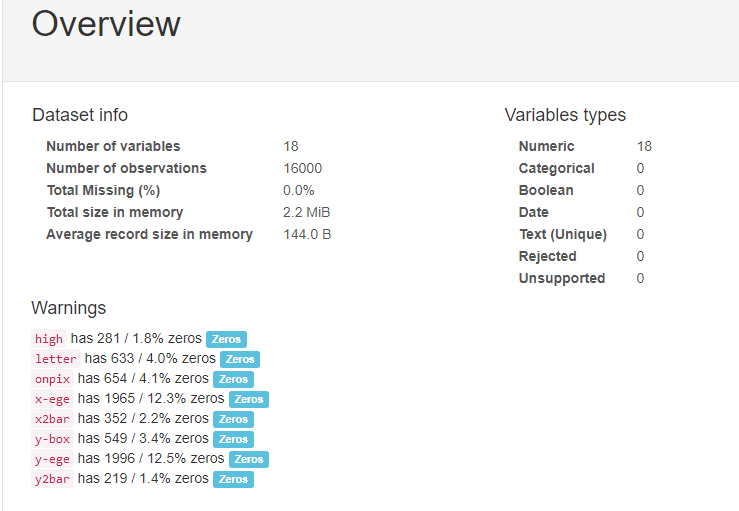

In [50]:
display(Image(filename = "../Images/TrainingData_Post_Profiling.png", width=800, unconfined=True))

In [51]:
profile = pandas_profiling.ProfileReport(test)
profile.to_file(outputfile="../PandasProfiling/TestData_Post_Profiling.html")

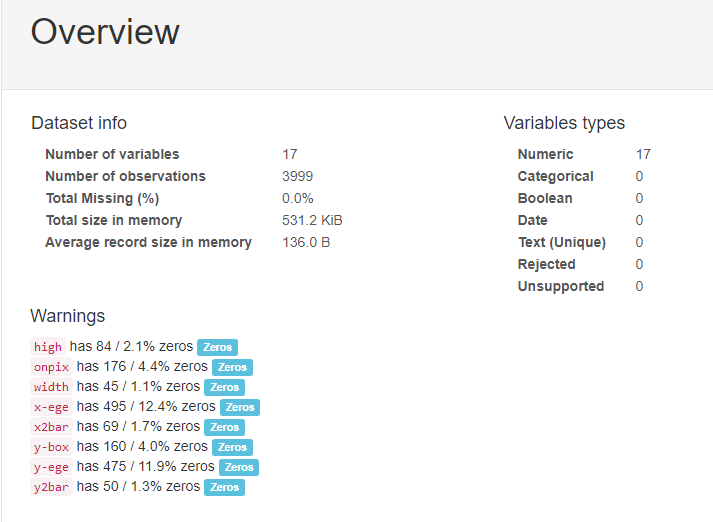

In [52]:
display(Image(filename = "../Images/TestData_Post_Profiling.png", width=800, unconfined=True))

#### [Back to Index](#Index)

<a id=section6><a/>

## 6. Exploratory Data Analysis(EDA)

<a id=sectionA><a/>

### A. Univariate analysis

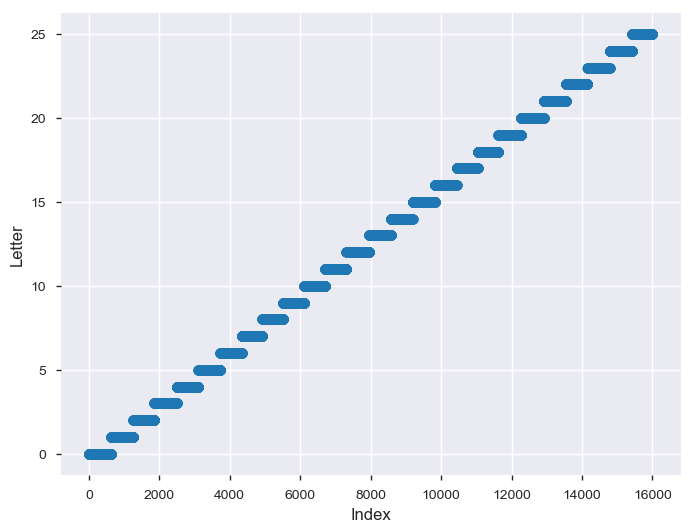

In [53]:
target_col = "letter"

plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train[target_col].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Letter', fontsize=12)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



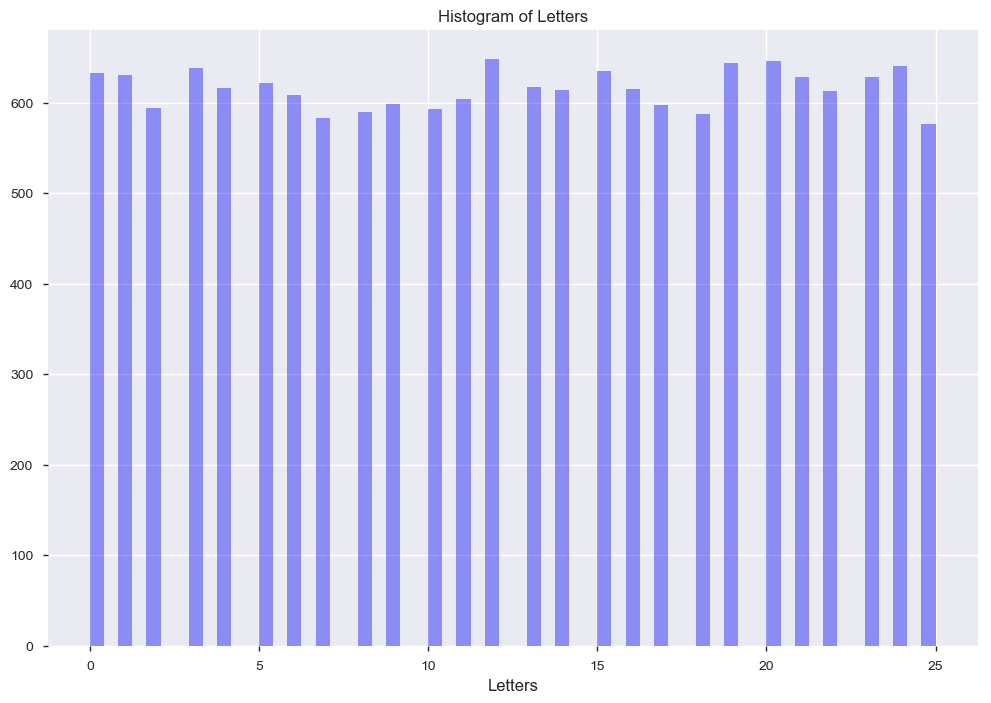

In [54]:
plt.figure(figsize=(12,8))
sns.distplot(train[target_col].values, bins=60, kde=False, color="blue")
plt.title("Histogram of Letters")
plt.xlabel('Letters', fontsize=12)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



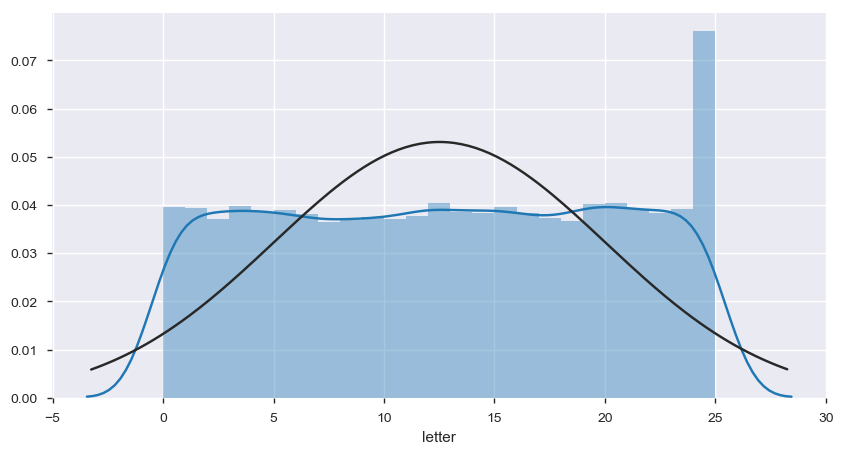

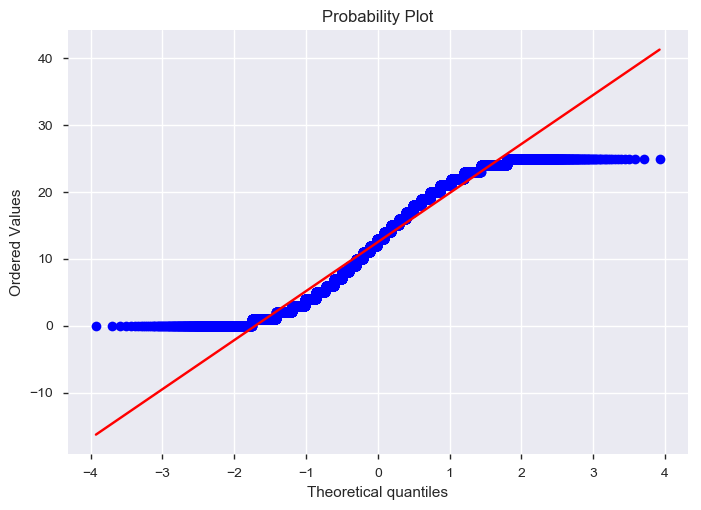

In [55]:
from scipy.stats import norm
from scipy import stats
plt.figure(figsize= (10,5))
#histogram and normal probability plot
sns.distplot(train['letter'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['letter'], plot=plt)

- Since its a cetegoricle feature , distribution plot shows each category as shown above.
- From the above probability curve we can see that its a sigmoid curve.

- Lets see the Correlation

In [56]:
corr=train.corr()["letter"]
corr[np.argsort(corr, axis=0)[::-1]]

letter    1.000000
x2ybr     0.391669
xegvy     0.339279
y-bar     0.312588
x-box     0.099947
width     0.095427
x-ege     0.081697
high      0.036897
id        0.012573
y2bar     0.011314
y-box    -0.006871
onpix    -0.008755
x-bar    -0.049841
y-ege    -0.065183
xybar    -0.080450
x2bar    -0.115361
xy2br    -0.138993
yegvx    -0.184346
Name: letter, dtype: float64

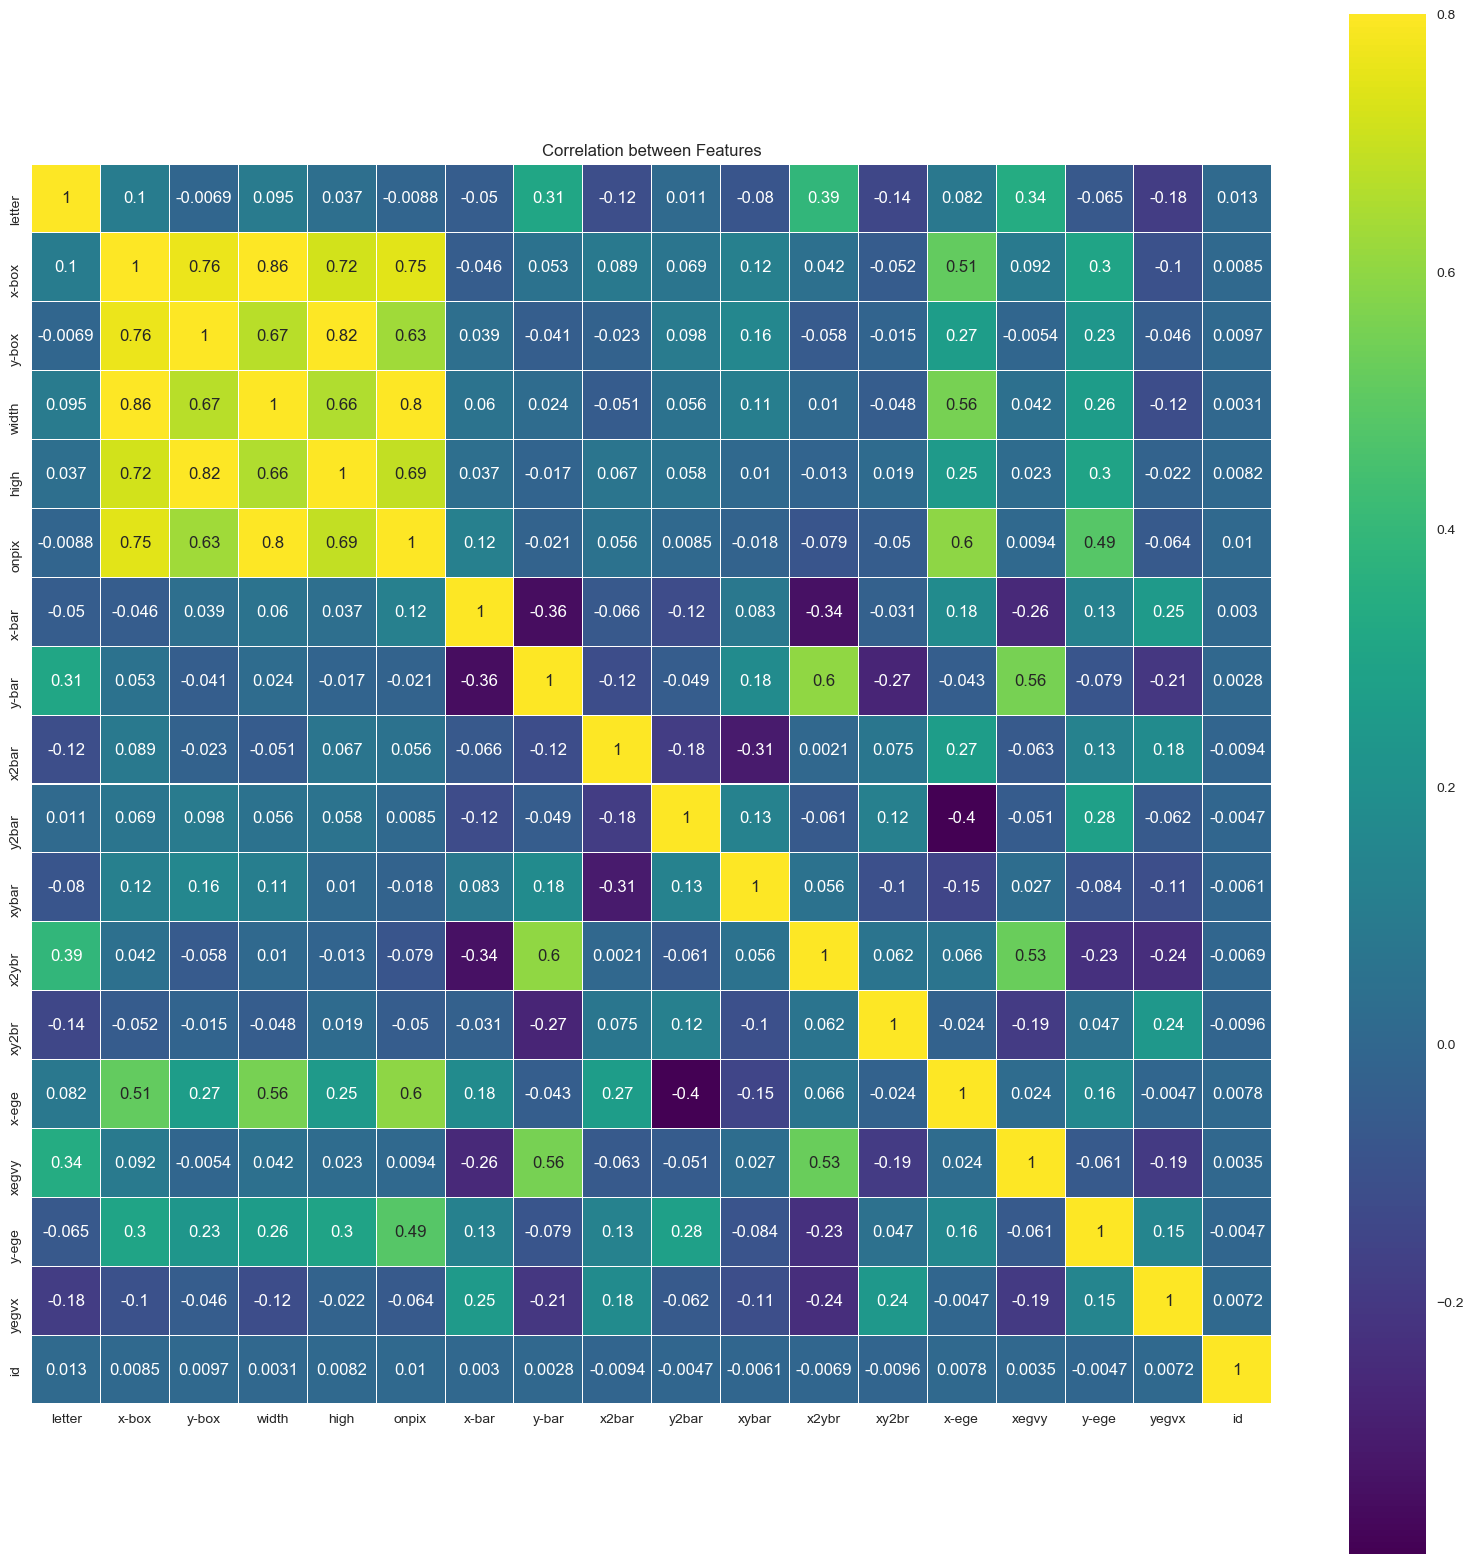

In [57]:
corrMatrix = train.corr()

sns.set(font_scale=1)
plt.figure(figsize=(20, 20))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between Features');

#### Multicollinearity

In [58]:
correlations = train.corr()# taking correlation into variable
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

Attribute Pair  Correlation
8   (width, x-box)     0.864148
5    (high, y-box)     0.822711
1   (onpix, width)     0.797975
12  (x-box, y-box)     0.763813
14  (onpix, x-box)     0.748248
2    (high, x-box)     0.717376
9    (high, onpix)     0.692302
0   (width, y-box)     0.669572
11   (high, width)     0.657547
3   (onpix, y-box)     0.629708
15  (x2ybr, y-bar)     0.602633
13  (onpix, x-ege)     0.595594
7   (width, x-ege)     0.556820
4   (xegvy, y-bar)     0.555728
10  (x2ybr, xegvy)     0.528723
6   (x-box, x-ege)     0.514674

- From above plot we can see that data has less correlation but more Multicollinearity.
- We will take care of this in feature engineering

#### [Back to Index](#Index)

<a id=sectionB><a/>

### B. What does X-box, y-box, width, high, onpix gives us the information ?

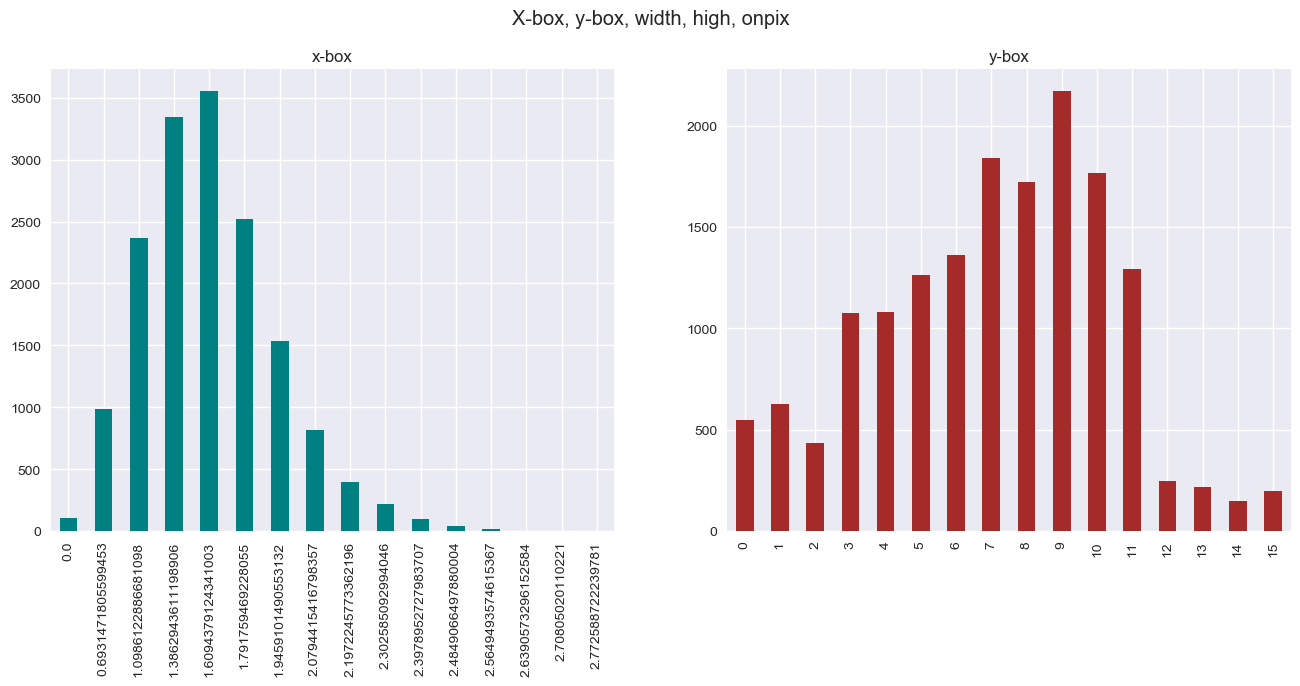

In [59]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6));
train['x-box'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='x-box');
train['y-box'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='y-box');
plt.suptitle('X-box, y-box, width, high, onpix');

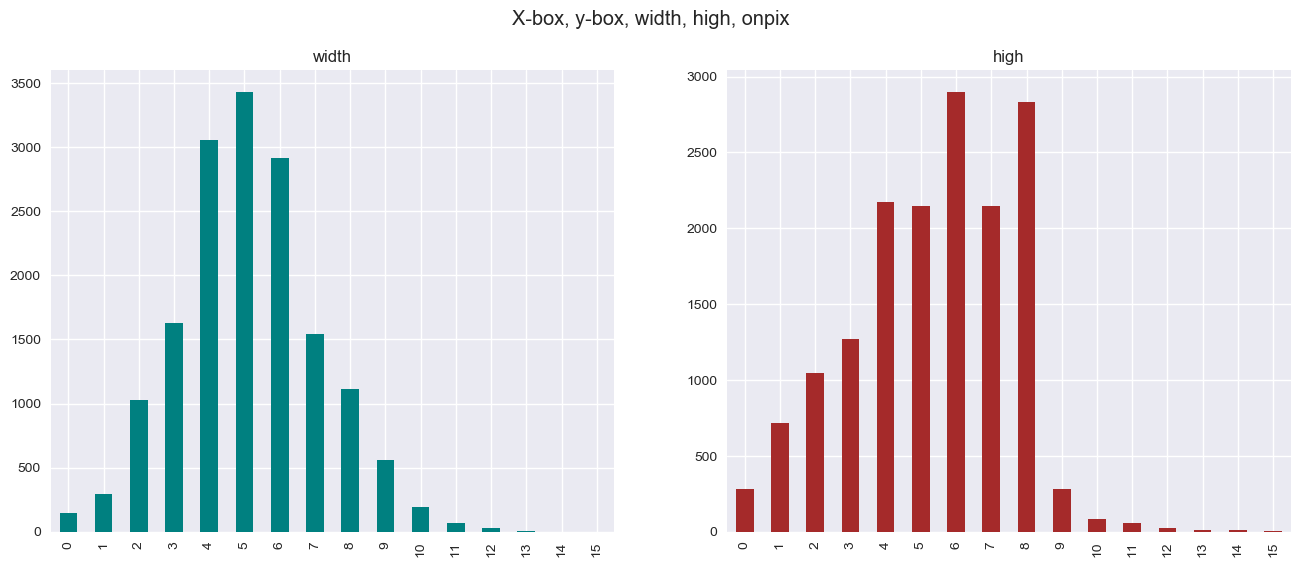

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6));
train['width'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='width');
train['high'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='brown', title='high');
plt.suptitle('X-box, y-box, width, high, onpix');

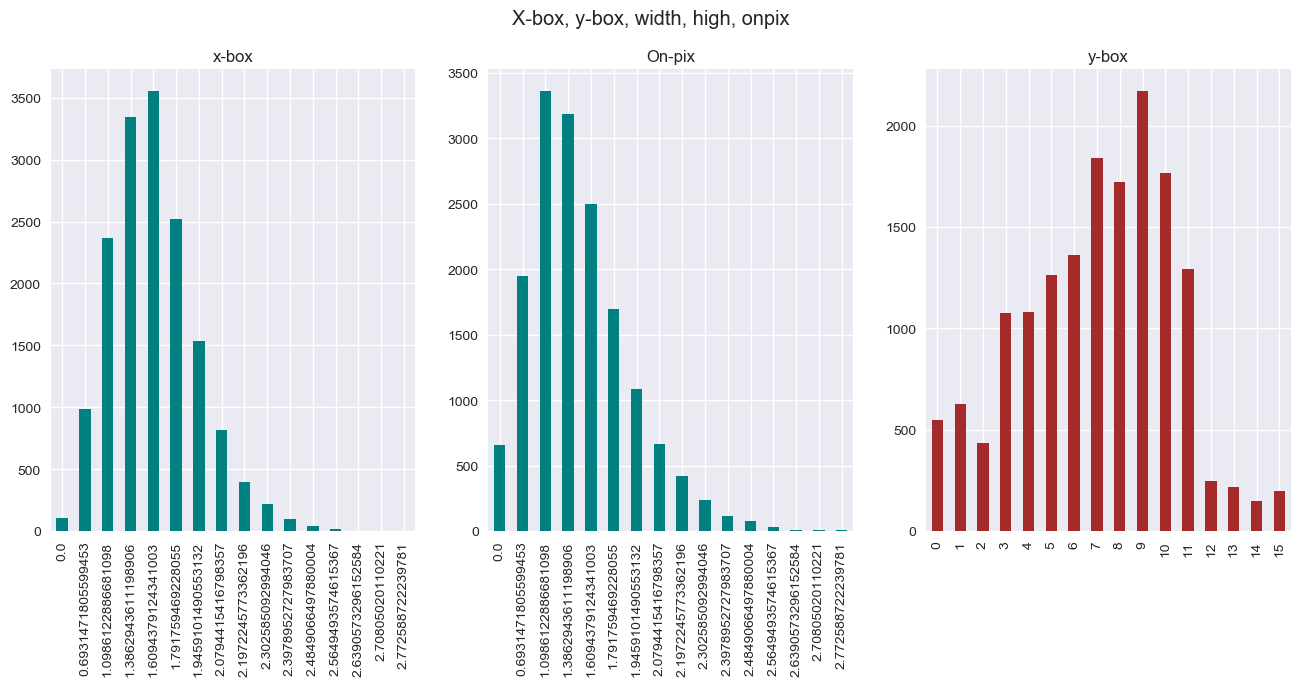

In [61]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6));
train['x-box'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='teal', title='x-box');
train['onpix'].value_counts().sort_index().plot(kind='bar', ax=ax[1], color='teal', title='On-pix');
train['y-box'].value_counts().sort_index().plot(kind='bar', ax=ax[2], color='brown', title='y-box');
plt.suptitle('X-box, y-box, width, high, onpix');

- All these five features have correlation, which is not good for modeling.
- On-pix had huge skew which has reduced after log transformation.

#### [Back to Index](#Index)

<a id=section7><a/>

## 7. Feature selection and Model building

- Lets drop id columns

In [62]:
train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)

<a id=section7A><a/>

### A. VIF for feature selection

In [63]:
target = train.pop('letter')

In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test = train_test_split(train, test_size=0.20, random_state=1)

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [65]:
print(X_train.shape)
X_test.shape

(12800, 16)


(3200, 16)

In [66]:
X_train.head()

x-box  y-box  width  high     onpix  x-bar  y-bar     x2bar  y2bar  \
883    1.386294      7      4     5  1.098612      7     11  1.386294      7   
11157  1.609438      2      4     4  1.386294      8      7  2.079442      5   
5261   1.386294      8      3     6  1.098612      5      7  2.397895      8   
1407   1.609438      7      4     5  1.609438      7      8  2.079442      4   
4253   1.098612      8      3     6  0.693147     12      2  2.302585      4   

       xybar  x2ybr  xy2br     x-ege  xegvy  y-ege  yegvx  
883       10      9      4  1.098612     11      3      5  
11157      7      6      8  1.098612      9      9      8  
5261       6      6      5  1.386294      8      4      8  
1407       9      7      8  1.386294      8      3      8  
4253      14      6     13  0.693147      6      0      8

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif= vif.sort_values(by="VIF", ascending =False)
vif

Features     VIF
0     x-box  101.61
2     width   44.94
4     onpix   41.55
13    xegvy   40.63
3      high   29.75
15    yegvx   29.38
6     y-bar   24.46
1     y-box   23.59
11    xy2br   17.91
5     x-bar   15.74
12    x-ege   15.73
10    x2ybr   15.61
9     xybar   15.49
7     x2bar   14.32
8     y2bar    8.94
14    y-ege    5.27

- VIF is the reciprocal of the tolerance value; small VIF values indicates low correlation among variables under ideal conditions VIF<3. However it is acceptable if it is less than 10.
- But here we can see apart from 4 variables all other are having VIF above 15. We have to find some other way to eleminate multicorrelation

#### [Back to Index](#Index)

<a id=section7B><a/>

### B. Recursive Feature Elimination

The __Recursive Feature Elimination (RFE)__ method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

- This recipe shows the use of RFE on the Iris floweres dataset to select 3 attributes.

#### RFE with Logistic Regression

In [68]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# create the RFE model and select 1 attributes
rfe = RFE(model, 1)
rfe = rfe.fit(train, target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
  True False False False]
[ 4 16 11 15  3 14  8  2  6 13 10  7  1  5  9 12]


In [69]:
features_bool = np.array(rfe.support_)
features = np.array(train.columns)
result = features[features_bool]

features_rank = rfe.ranking_
rank = features_rank[features_bool]

In [70]:
count=0
mylist = []
for ev in features:
    print('Columns : {} and its ranking : {}'.format(ev,features_rank[count]))
    count +=1

dictionery = dict(zip(features_rank,features))
print(dictionery)

Columns : x-box and its ranking : 4
Columns : y-box and its ranking : 16
Columns : width and its ranking : 11
Columns : high and its ranking : 15
Columns : onpix and its ranking : 3
Columns : x-bar and its ranking : 14
Columns : y-bar and its ranking : 8
Columns : x2bar and its ranking : 2
Columns : y2bar and its ranking : 6
Columns : xybar and its ranking : 13
Columns : x2ybr and its ranking : 10
Columns : xy2br and its ranking : 7
Columns : x-ege and its ranking : 1
Columns : xegvy and its ranking : 5
Columns : y-ege and its ranking : 9
Columns : yegvx and its ranking : 12
{4: 'x-box', 16: 'y-box', 11: 'width', 15: 'high', 3: 'onpix', 14: 'x-bar', 8: 'y-bar', 2: 'x2bar', 6: 'y2bar', 13: 'xybar', 10: 'x2ybr', 7: 'xy2br', 1: 'x-ege', 5: 'xegvy', 9: 'y-ege', 12: 'yegvx'}


In [71]:
dicter = sorted(dictionery.items())
lis = dict(dicter)
sel_var = lis.values()
final_list = list(sel_var)

In [72]:
from sklearn.metrics import accuracy_score
maxscore = [0,]

for ev in range(1, len(train.columns)+1):
    X = final_list[:ev]
    X_train, X_test, y_train, y_test = train_test_split(train[X], target, test_size=0.20, random_state=1)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    accur = accuracy_score(y_pred_test,y_test)
    maxscore.append(accur)
    print("Accuracy Score : {}".format(accur))
    print("Columns : {}".format(X))
    
    
print("-------------------------------------------------")
print("Best Score : {}".format(max(maxscore)))

Accuracy Score : 0.1209375
Columns : ['x-ege']
Accuracy Score : 0.1559375
Columns : ['x-ege', 'x2bar']
Accuracy Score : 0.2165625
Columns : ['x-ege', 'x2bar', 'onpix']
Accuracy Score : 0.235625
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box']
Accuracy Score : 0.3371875
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy']
Accuracy Score : 0.40625
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy', 'y2bar']
Accuracy Score : 0.49375
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy', 'y2bar', 'xy2br']
Accuracy Score : 0.5553125
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy', 'y2bar', 'xy2br', 'y-bar']
Accuracy Score : 0.6209375
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy', 'y2bar', 'xy2br', 'y-bar', 'y-ege']
Accuracy Score : 0.639375
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy', 'y2bar', 'xy2br', 'y-bar', 'y-ege', 'x2ybr']
Accuracy Score : 0.649375
Columns : ['x-ege', 'x2bar', 'onpix', 'x-box', 'xegvy', 'y2bar', 'xy2br', 'y-bar', 'y-ege', 'x2ybr', 'wid

#### RFE with Decision Tree Model

In [73]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()

# create the RFE model and select 1 attributes
rfe = RFE(DT_model, 1)
rfe = rfe.fit(train, target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False  True False False
 False False False False]
[16 12 14 15 13 11 10  7  2  1  8  6  3  5  4  9]


In [74]:
features_bool = np.array(rfe.support_)
features = np.array(train.columns)
result = features[features_bool]

features_rank = rfe.ranking_
rank = features_rank[features_bool]

In [75]:
count=0
mylist = []
for ev in features:
    print('Columns : {} and its ranking : {}'.format(ev,features_rank[count]))
    count +=1

dictionery = dict(zip(features_rank,features))
print(dictionery)

Columns : x-box and its ranking : 16
Columns : y-box and its ranking : 12
Columns : width and its ranking : 14
Columns : high and its ranking : 15
Columns : onpix and its ranking : 13
Columns : x-bar and its ranking : 11
Columns : y-bar and its ranking : 10
Columns : x2bar and its ranking : 7
Columns : y2bar and its ranking : 2
Columns : xybar and its ranking : 1
Columns : x2ybr and its ranking : 8
Columns : xy2br and its ranking : 6
Columns : x-ege and its ranking : 3
Columns : xegvy and its ranking : 5
Columns : y-ege and its ranking : 4
Columns : yegvx and its ranking : 9
{16: 'x-box', 12: 'y-box', 14: 'width', 15: 'high', 13: 'onpix', 11: 'x-bar', 10: 'y-bar', 7: 'x2bar', 2: 'y2bar', 1: 'xybar', 8: 'x2ybr', 6: 'xy2br', 3: 'x-ege', 5: 'xegvy', 4: 'y-ege', 9: 'yegvx'}


In [76]:
dicter = sorted(dictionery.items())
lis = dict(dicter)
sel_var = lis.values()
final_list = list(sel_var)

In [77]:
maxscore = [0,]

for ev in range(1, len(train.columns)+1):
    X = final_list[:ev]
    X_train, X_test, y_train, y_test = train_test_split(train[X], target, test_size=0.20, random_state=1)
    DT_model.fit(X_train, y_train)
    y_pred_test = DT_model.predict(X_test)
    accur = accuracy_score(y_pred_test,y_test)
    maxscore.append(accur)
    print("Accuracy Score : {}".format(accur))
    print("Columns : {}".format(X))
    
    
print("-------------------------------------------------")
print("Best Score : {}".format(max(maxscore)))

Accuracy Score : 0.1375
Columns : ['xybar']
Accuracy Score : 0.2828125
Columns : ['xybar', 'y2bar']
Accuracy Score : 0.485
Columns : ['xybar', 'y2bar', 'x-ege']
Accuracy Score : 0.7028125
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege']
Accuracy Score : 0.78125
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy']
Accuracy Score : 0.8265625
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy', 'xy2br']
Accuracy Score : 0.856875
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy', 'xy2br', 'x2bar']
Accuracy Score : 0.8640625
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy', 'xy2br', 'x2bar', 'x2ybr']
Accuracy Score : 0.87875
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy', 'xy2br', 'x2bar', 'x2ybr', 'yegvx']
Accuracy Score : 0.884375
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy', 'xy2br', 'x2bar', 'x2ybr', 'yegvx', 'y-bar']
Accuracy Score : 0.8796875
Columns : ['xybar', 'y2bar', 'x-ege', 'y-ege', 'xegvy', 'xy2br', 'x2bar', 'x2ybr', 'yegvx', 'y-bar', 'x-bar']
A

#### [Back to Index](#Index)

#### RFE with Random Forest

In [78]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

# create the RFE model and select 1 attributes
rfe = RFE(RF_model, 1)
rfe = rfe.fit(train, target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
  True False False False]
[15 14 13 16 12 11  8  4  5  7  2  6  1  9  3 10]


In [79]:
features_bool = np.array(rfe.support_)
features = np.array(train.columns)
result = features[features_bool]

features_rank = rfe.ranking_
rank = features_rank[features_bool]

features_rank

array([15, 14, 13, 16, 12, 11,  8,  4,  5,  7,  2,  6,  1,  9,  3, 10])

In [80]:
count=0
mylist = []
for ev in features:
    print('Columns : {} and its ranking : {}'.format(ev,features_rank[count]))
    count +=1

dictionery = dict(zip(features_rank,features))
print(dictionery)

Columns : x-box and its ranking : 15
Columns : y-box and its ranking : 14
Columns : width and its ranking : 13
Columns : high and its ranking : 16
Columns : onpix and its ranking : 12
Columns : x-bar and its ranking : 11
Columns : y-bar and its ranking : 8
Columns : x2bar and its ranking : 4
Columns : y2bar and its ranking : 5
Columns : xybar and its ranking : 7
Columns : x2ybr and its ranking : 2
Columns : xy2br and its ranking : 6
Columns : x-ege and its ranking : 1
Columns : xegvy and its ranking : 9
Columns : y-ege and its ranking : 3
Columns : yegvx and its ranking : 10
{15: 'x-box', 14: 'y-box', 13: 'width', 16: 'high', 12: 'onpix', 11: 'x-bar', 8: 'y-bar', 4: 'x2bar', 5: 'y2bar', 7: 'xybar', 2: 'x2ybr', 6: 'xy2br', 1: 'x-ege', 9: 'xegvy', 3: 'y-ege', 10: 'yegvx'}


In [81]:
dicter = sorted(dictionery.items())
lis = dict(dicter)
sel_var = lis.values()
final_list = list(sel_var)

In [82]:
maxscore = [0,]

for ev in range(1, len(train.columns)+1):
    X = final_list[:ev]
    X_train, X_test, y_train, y_test = train_test_split(train[X], target, test_size=0.20, random_state=1)
    RF_model.fit(X_train, y_train)
    y_pred_test = RF_model.predict(X_test)
    accur = accuracy_score(y_pred_test,y_test)
    maxscore.append(accur)
    print("Accuracy Score : {}".format(accur))
    print("Columns : {}".format(X))
    
    
print("-------------------------------------------------")
print("Best Score : {}".format(max(maxscore)))

Accuracy Score : 0.175625
Columns : ['x-ege']
Accuracy Score : 0.368125
Columns : ['x-ege', 'x2ybr']
Accuracy Score : 0.55375
Columns : ['x-ege', 'x2ybr', 'y-ege']
Accuracy Score : 0.719375
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar']
Accuracy Score : 0.815
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar']
Accuracy Score : 0.87125
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar', 'xy2br']
Accuracy Score : 0.9075
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar', 'xy2br', 'xybar']
Accuracy Score : 0.915625
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar', 'xy2br', 'xybar', 'y-bar']
Accuracy Score : 0.9203125
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar', 'xy2br', 'xybar', 'y-bar', 'xegvy']
Accuracy Score : 0.929375
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar', 'xy2br', 'xybar', 'y-bar', 'xegvy', 'yegvx']
Accuracy Score : 0.9359375
Columns : ['x-ege', 'x2ybr', 'y-ege', 'x2bar', 'y2bar', 'xy2br', 'xybar', 'y-bar', 'xegvy', 'yegvx', 'x-bar']
Accu

- We can say first 12 parameters are giving good accuracy.

#### LightGBM with K-Folds

In [105]:
treefetTrain = train
treefetTest = test
treeTarget = target

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [106]:
# set default parameters for 1st round training
params = {'boosting': 'gbdt',
          'objective':'binary',
          'metric': 'binary_logloss',
          'learning_rate': 0.01, # 0.003! #0.005 #0.006 
          'num_leaves': 110, #110 #100 #150 large
          'max_bin': 66,  #60 #50 # large,but slower
          'max_depth': 10, # deal with over-fitting
          'min_data_in_leaf': 30, # deal with over-fitting
          'min_child_samples': 20,
          'feature_fraction': 0.5,#0.5 #0.6 #0.8
          'bagging_fraction': 0.8,
          'bagging_freq': 40,#5  
          'bagging_seed': 11,
          'lambda_l1': 2,#1.3! #5 #1.2 #1
          'lambda_l2': 0.1 #0.1
         }

In [110]:
nfolds = 10
nrepeats = 2 
folds = RepeatedKFold(n_splits=nfolds, n_repeats=nrepeats, random_state=11)
fold_pred = np.zeros(len(treefetTrain))
feature_importance_df = pd.DataFrame()
lgb_preds = np.zeros(len(treefetTest))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(treefetTrain.values,treeTarget.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(treefetTrain.iloc[trn_idx], label=treeTarget.iloc[trn_idx]) #categorical_feature=categorical_feats
    val_data = lgb.Dataset(treefetTrain.iloc[val_idx], label=treeTarget.iloc[val_idx]) #categorical_feature=categorical_feats

    iteration = 2000
    lgb_m = lgb.train(params, trn_data, iteration, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    fold_pred[val_idx] = lgb_m.predict(treefetTrain.iloc[val_idx], num_iteration=lgb_m.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = treefetTrain.columns
    fold_importance_df["importance"] = lgb_m.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    lgb_preds += lgb_m.predict(treefetTest, num_iteration=lgb_m.best_iteration) / (nfolds*nrepeats)

fold n°0
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0499013	valid_1's binary_logloss: 0.0508391
[200]	training's binary_logloss: 0.0262201	valid_1's binary_logloss: 0.0278238
[300]	training's binary_logloss: 0.0162128	valid_1's binary_logloss: 0.0181711
[400]	training's binary_logloss: 0.0111461	valid_1's binary_logloss: 0.0132155
[500]	training's binary_logloss: 0.00837965	valid_1's binary_logloss: 0.0103328
[600]	training's binary_logloss: 0.00672477	valid_1's binary_logloss: 0.00879251
[700]	training's binary_logloss: 0.00565037	valid_1's binary_logloss: 0.0078003
[800]	training's binary_logloss: 0.00497334	valid_1's binary_logloss: 0.00722265
[900]	training's binary_logloss: 0.00457953	valid_1's binary_logloss: 0.00681247
[1000]	training's binary_logloss: 0.00417899	valid_1's binary_logloss: 0.00638717
[1100]	training's binary_logloss: 0.0039601	valid_1's binary_logloss: 0.0061881
[1200]	training's binary_logloss: 0.00376482	va

[600]	training's binary_logloss: 0.00694826	valid_1's binary_logloss: 0.0102988
[700]	training's binary_logloss: 0.00584604	valid_1's binary_logloss: 0.00924961
[800]	training's binary_logloss: 0.0050822	valid_1's binary_logloss: 0.00867
[900]	training's binary_logloss: 0.00461273	valid_1's binary_logloss: 0.00818886
[1000]	training's binary_logloss: 0.00426669	valid_1's binary_logloss: 0.00779676
[1100]	training's binary_logloss: 0.00396284	valid_1's binary_logloss: 0.00758133
[1200]	training's binary_logloss: 0.00376594	valid_1's binary_logloss: 0.00743307
[1300]	training's binary_logloss: 0.00360245	valid_1's binary_logloss: 0.0073331
[1400]	training's binary_logloss: 0.00351606	valid_1's binary_logloss: 0.00734511
Early stopping, best iteration is:
[1321]	training's binary_logloss: 0.00356981	valid_1's binary_logloss: 0.00731592
fold n°6
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0505581	valid_1's binary_logloss: 0.0446389
[200

[900]	training's binary_logloss: 0.00439795	valid_1's binary_logloss: 0.0129591
[1000]	training's binary_logloss: 0.00406903	valid_1's binary_logloss: 0.0126278
[1100]	training's binary_logloss: 0.00385942	valid_1's binary_logloss: 0.0125337
[1200]	training's binary_logloss: 0.00367593	valid_1's binary_logloss: 0.0123295
[1300]	training's binary_logloss: 0.00356145	valid_1's binary_logloss: 0.0121614
[1400]	training's binary_logloss: 0.00343111	valid_1's binary_logloss: 0.0119817
[1500]	training's binary_logloss: 0.00339554	valid_1's binary_logloss: 0.0119266
[1600]	training's binary_logloss: 0.00335691	valid_1's binary_logloss: 0.0118668
[1700]	training's binary_logloss: 0.00335549	valid_1's binary_logloss: 0.0118596
[1800]	training's binary_logloss: 0.00330052	valid_1's binary_logloss: 0.0117874
[1900]	training's binary_logloss: 0.00325305	valid_1's binary_logloss: 0.0117573
Early stopping, best iteration is:
[1888]	training's binary_logloss: 0.00325386	valid_1's binary_logloss: 0.01

[1500]	training's binary_logloss: 0.00333752	valid_1's binary_logloss: 0.00666146
[1600]	training's binary_logloss: 0.00326392	valid_1's binary_logloss: 0.00658669
[1700]	training's binary_logloss: 0.00323067	valid_1's binary_logloss: 0.00657266
[1800]	training's binary_logloss: 0.00317918	valid_1's binary_logloss: 0.00647722
Early stopping, best iteration is:
[1794]	training's binary_logloss: 0.00317918	valid_1's binary_logloss: 0.00647722
fold n°16
Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.0508812	valid_1's binary_logloss: 0.0525465
[200]	training's binary_logloss: 0.026119	valid_1's binary_logloss: 0.0293881
[300]	training's binary_logloss: 0.0162824	valid_1's binary_logloss: 0.0201601
[400]	training's binary_logloss: 0.0110645	valid_1's binary_logloss: 0.015293
[500]	training's binary_logloss: 0.00826091	valid_1's binary_logloss: 0.0129379
[600]	training's binary_logloss: 0.00663891	valid_1's binary_logloss: 0.0115577
[700]	tr

- Before we apply Ensemble Methods on data we have tried the above Algorithm which is from the same family.
- LightGBM is used by many engineers for its simplisity and speed.
- We have got our best combination and prediction in __lgb_preds__ variable, we can use it for the comparision of out result.

In [113]:
lgb_preds.shape

(3999,)

In [114]:
# Add target value to submition file
lgb_submition = pd.DataFrame(lgb_preds)
lgb_submition.to_csv("../FinalSubmission/finalPrediction_submition.csv", index=False)

- We will keep it aside and let’s try some Ensemble Learning on the data, if we dint get the better results than LightGBM we will submit the above file since it’s the better result we have got so far.

#### [Back to Index](#Index)

<a id=section7C><a/>

### C. EnsembleLearning

In [87]:
X = train
y = target

#### Getting some classifiers to evaluate

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

seed = 1075
np.random.seed(seed)

# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()

clf_array = [rf, et, knn, svc]

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, 
                                                              vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, 
                                                                        bagging_scores.mean(), bagging_scores.std()))
    

Mean of: 0.932, std: (+/-) 0.008 [RandomForestClassifier]
Mean of: 0.932, std: (+/-) 0.006 [Bagging RandomForestClassifier]

Mean of: 0.941, std: (+/-) 0.006 [ExtraTreesClassifier]
Mean of: 0.940, std: (+/-) 0.006 [Bagging ExtraTreesClassifier]

Mean of: 0.923, std: (+/-) 0.008 [KNeighborsClassifier]
Mean of: 0.906, std: (+/-) 0.009 [Bagging KNeighborsClassifier]

Mean of: 0.950, std: (+/-) 0.006 [SVC]
Mean of: 0.891, std: (+/-) 0.006 [Bagging SVC]



#### Set up Voting

In [89]:
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), 
                                    ('KNeighbors', knn), ('SVC', svc)], voting='hard')

for clf, label in zip([rf, et, knn, svc,eclf], ['Random Forest', 'Extra Trees', 
                                                     'KNeighbors', 'SVC','Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.932, std: (+/-) 0.008 [Random Forest]
Mean: 0.943, std: (+/-) 0.005 [Extra Trees]
Mean: 0.923, std: (+/-) 0.008 [KNeighbors]
Mean: 0.950, std: (+/-) 0.006 [SVC]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that 

Mean: 0.954, std: (+/-) 0.004 [Ensemble]


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



#### Setting up ensemble voting for bagging

In [90]:
ebclf_array = []

for clf in clf_array:
    ebclf_array.append(BaggingClassifier(clf, max_samples=0.25, 
                                   max_features=10, random_state=seed))

v_eclf = VotingClassifier(estimators=zip(['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors',
                                          'Bagging SVC', 'Bagging Ensemble'],
                                         ebclf_array), 
                          voting='hard')

#ebclf_array.append(v_eclf)

for clf, label in zip(ebclf_array, ['Bagging Random Forest', 'Bagging Extra Trees', 'Bagging KNeighbors',
                              'Bagging SVC', 'Bagging Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Mean: 0.918, std: (+/-) 0.005 [Bagging Random Forest]
Mean: 0.929, std: (+/-) 0.007 [Bagging Extra Trees]
Mean: 0.889, std: (+/-) 0.007 [Bagging KNeighbors]
Mean: 0.869, std: (+/-) 0.006 [Bagging SVC]


#### Create Boosting Classifiers

In [98]:
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

warnings.filterwarnings('ignore')

In [101]:
from mlens.ensemble import SuperLearner
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()

seed = 1075

ensemble = SuperLearner(scorer = accuracy_score, 
                        random_state=seed, 
                        folds=10,
                        verbose = 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# Build the first layer
ensemble.add([rf, et, knn])
# Attach the final meta estimator
ensemble.add_meta(lr)

ensemble.fit(X_train, y_train)
preds = ensemble.predict(X_test)
print("Fit data:\n%r" % ensemble.data)
a = "{:.3f}".format(accuracy_score(preds,y_test))
print("Accuracy score: ", a)

[MLENS] backend: threading



Fitting 2 layers
Processing layer-1             done | 00:00:08
Processing layer-2             done | 00:00:01
Fit complete                        | 00:00:10

Predicting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01
Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  extratreesclassifier         0.93     0.01  0.50  0.18  0.05  0.09
layer-1  kneighborsclassifier         0.91     0.01  0.11  0.06  0.49  0.14
layer-1  randomforestclassifier       0.92     0.01  0.42  0.04  0.02  0.01

Accuracy score:  0.324


#### [Back to Index](#Index)

<a id=section8><a/>

## 8. Model Selection and Submission

__Brief__

- I have tried several ML models for the Letter prediction data set, we have seen many different result with many different combination of parameters.
- After looking at all the results and comparing the RMSE of each results, We think __LightGBM__ will be the best model for prediction.
- __LightGBM__ will be fast and also its giving good results.

In [120]:
submission_data = pd.read_csv("../FinalSubmission/finalPrediction_submition.csv")

In [121]:
submission_data.rename(index=str, columns={"0": "test_target"}, inplace= True)

In [122]:
submission_data.head()

test_target
0     0.999859
1     0.999362
2     0.999743
3     0.999793
4     0.997478

#### [Back to Index](#Index)

<a id=section9><a/>

## 9. Conclusion and Reference

### Conclusion

- ML projects are inherently uncertain and the approach i have used is accountable for hitting a specific accuracy goal. 
- I have performed error analysis for each model, I have tried to tune the models to get accurate results. 
- I have tried to implement all of my ideas as much as possible. I have done some trial and error to see how it works.
- I have explored and performed Data Analysis and Data Cleaning to build my ML Model as accurate as possible.
- Overall the Model looks good and __LightGBM model__ has given good accuracy. Will try to tune up the model in future.

### Reference

- Please refer the path mentioned below for predicted results for test data.
https://github.com/yogeshchandrark/DataScienceProjectRepo/tree/Mybranch/EY_Project/Loyalty%20prediction/Transformed_Datafiles

file name: finalPrediction_submition.csv

- Please refer below link for the project.

https://github.com/yogeshchandrark/DataScienceProjectRepo/tree/Mybranch/EY_Project/Loyalty%20prediction